In [24]:
%pylab inline

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## Easy to load

Note: If you haven't done so yet, generate a "result.csv" file by runnning ```make result``` from the command line in the parent directory of this git repository

In [25]:
df = pd.read_csv('../data_generator/results/result.csv')

In [26]:
df.head()

,here,is,a,sample,header,to,try
0,6771,3406,474,130,1717,2331,5377
1,375,3743,4036,7123,312,1745,553
2,5224,5135,1776,3443,2730,4075,3100
3,4304,7300,7157,3175,6552,2554,2766
4,4023,5754,7457,3113,3175,1617,1344


## Quick to analyze

In [27]:
df.describe()

,here,is,a,sample,header,to,try
count,25100.000000,25100.000000,25100.000000,25100.000000,25100.000000,25100.000000,25100.000000
mean,3892.601594,3904.173825,3886.898765,3860.555737,3912.262032,3875.674422,3885.523984
std,2311.807900,2289.355877,2307.604485,2292.949294,2294.116489,2299.705854,2305.860627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1773.000000,2030.750000,1770.750000,1762.000000,2024.000000,1773.000000,1766.000000
50%,4024.000000,4007.000000,4004.000000,3747.000000,4011.000000,3757.000000,3773.000000
75%,6001.000000,5776.000000,6002.000000,5756.000000,6014.000000,5773.000000,6001.000000
max,7777.000000,7777.000000,7777.000000,7777.000000,7777.000000,7777.000000,7777.000000


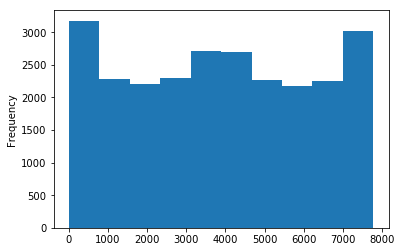

In [28]:
_=df['sample'].plot(kind='hist',bins=10)

## Easy filtering

In [29]:
mask = range(2000,2500)

In [30]:
df_filt = df[df['sample'].isin(mask)]
df_filt.head()

,here,is,a,sample,header,to,try
11,1704,247,1473,2270,7623,5334,5615
12,6203,5234,6167,2014,6341,4761,5127
27,7407,6516,3603,2424,5542,2141,7633
62,3715,3133,6333,2365,7173,6355,3743
63,2745,3066,5137,2177,3631,2572,7002


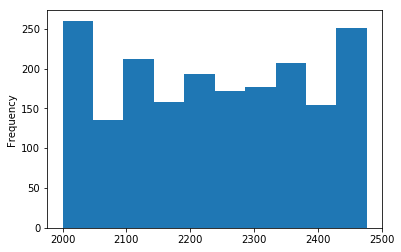

In [31]:
_=df_filt['sample'].plot(kind='hist',bins=10)

## Easy to export to RLDB (from Python or from BASH)

In [ ]:
import psycopg2 as sql

In [ ]:
SQL_STATEMENT = """
    COPY %s FROM STDIN WITH
        CSV
        HEADER
        DELIMITER AS ','
"""

In [ ]:
def csv2db(conn, table_name, fh):
    cursor = conn.cursor()
    cursor.copy_expert(sql=SQL_STATEMENT % table_name, file=fh)
    conn.commit()
    cursor.close()

In [ ]:
connection = sql.connect("dbname=cdse user=qwofford password=NOTMYPASSWORD")
try:
    csv2db(connection,'master',fh)
finally:
    connection.close()